<a href="https://colab.research.google.com/github/JayanthPrudhivi6/JayanthPrudhivi_INFO5502_Spring2022/blob/main/lab_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
# Your answer here (code + explanation):
# Your answer here (code + explanation):
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

#1)
path = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]")
print('Here we have {} categories '.format(len(path)))

#2)
for i in path:
  docs = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
  print('file {} has {} documents'.format(i,len(docs)))







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Here we have 76 categories 
file 71 has 457 documents
file 75 has 473 documents
file 77 has 146 documents
file 76 has 177 documents
file 78 has 242 documents
file 73 has 705 documents
file 72 has 74 documents
file 9 has 744 documents
file 74 has 60 documents
file 8 has 521 documents
file 7 has 621 documents
file 63 has 194 documents
file 67 has 356 documents
file 66 has 207 documents
file 69 has 700 documents
file 70 has 192 documents
file 65 has 276 documents
fi

In [ ]:
#3)
import pandas as pd
s = 0
for i in path:
    files = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
    try:
        for file in files:
            filepath = os.path.join("/content/drive/MyDrive/preprocessed_cases[cases_29404]", i, file)
            data = pd.read_csv(filepath, sep="\t")
            s += data.shape[0] #sum
    except:
        print(i, file)
print("The average no of sentences in all categories is:", round(s/78, 2))
print("The average no of sentences in all files is:", round(s/29404, 2))

60 case0.txt
The average no of sentences in all categories is: 16777.94
The average no of sentences in all files is: 44.51


In [ ]:
#4)
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
s = 0
for folder in path:
    files = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in files:
            filepath = os.path.join("/content/drive/MyDrive/preprocessed_cases[cases_29404]", folder, file)
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].apply(lambda x: [item for item in x.split() if ((item not in stop) and (len(item)!= 1))])
                
                for sent in data[col]:
                    s += len(sent)
    except Exception as e:
        print(e)
        #print(i, file)
print("The average no of words in all categories is:", round(s/78, 2))
print("The average no of words in all files is:", round(s/29404, 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No columns to parse from file
The average no of words in all categories is: 779192.55
The average no of words in all files is: 2066.96


In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=9998eb1fb49930ac6f7c078feefba2e54e3d06ef0d0765497482a1cc234170b2
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
#5)

import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# creating a set of stop words that are obtained from STOPWORDS and stop_words
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))
# we combien both sets of stopwords to make a corpus of stopwords
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
print(len(stopwords))
import os

list_of_words = []
path = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    docs = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/drive/MyDrive/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].str.lower()
                data[col] = data[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                data[col] = data[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for sent in data[col]:
                    list_of_words.extend(sent.split())
       
    except Exception as e:
        print(e)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
211
No columns to parse from file


In [ ]:
from collections import Counter
# we get the top 50 unique terms and their count
(Counter(list_of_words).most_common(50))

[('court', 916393),
 ('district', 369283),
 ('state', 239811),
 ('also', 219517),
 ('evidence', 191553),
 ('whether', 188749),
 ('may', 181505),
 ('law', 170136),
 ('states', 159138),
 ('must', 157551),
 ('claim', 155616),
 ('case', 155121),
 ('federal', 153786),
 ('trial', 143642),
 ('united', 142231),
 ('claims', 139947),
 ('one', 135076),
 ('judgment', 131724),
 ('action', 128012),
 ('order', 125737),
 ('first', 120921),
 ('government', 119477),
 ('section', 114949),
 ('defendant', 112850),
 ('act', 112076),
 ('review', 109992),
 ('issue', 108128),
 ('two', 107845),
 ('motion', 106481),
 ('rule', 105741),
 ('decision', 105066),
 ('new', 104219),
 ('time', 101865),
 ('plaintiff', 100297),
 ('plaintiffs', 97733),
 ('filed', 93834),
 ('public', 93641),
 ('made', 92332),
 ('statute', 91710),
 ('jury', 90656),
 ('right', 89656),
 ('defendants', 86689),
 ('found', 86268),
 ('parties', 86005),
 ('held', 85614),
 ('supreme', 84880),
 ('use', 83016),
 ('within', 79376),
 ('based', 79152),
 (

In [ ]:
from collections import Counter
counter_list = (Counter(list_of_words).most_common(50))

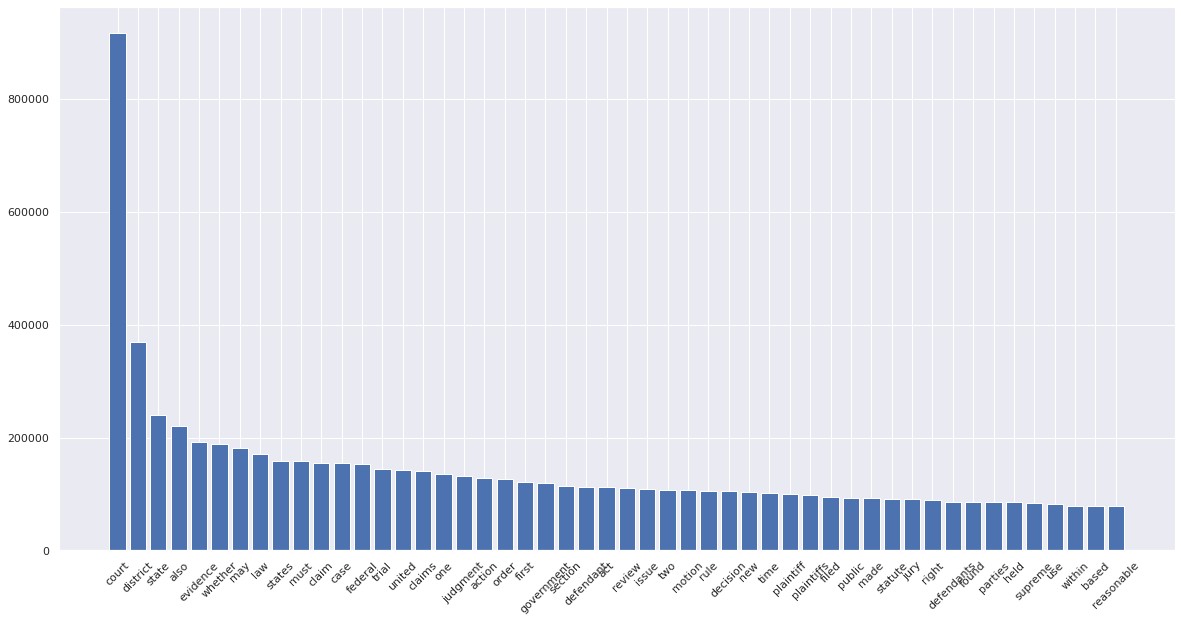

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(20,10)})
plt.bar(dict(counter_list).keys(), dict(counter_list).values())
plt.xticks(rotation =45)
plt.show()
#dict(counter_list).keys()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:




In [ ]:
# Your answer here (code + explanation):
# Your answer here (code + explanation):
# 1.)
import pandas as pd
url = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
# reading data from git
df = pd.read_csv(url)
# we loop through each file and print the following details
for col in df.columns:
    print("Column:",col)
    print("The no of rows are:", df[col].shape[0])
    print("The no of unique values in this column are:", df[col].value_counts().shape[0])
    print(df[col].value_counts())
    print()







Column: ge
The no of rows are: 131
The no of unique values in this column are: 2
M    72
F    59
Name: ge, dtype: int64

Column: cst
The no of rows are: 131
The no of unique values in this column are: 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column: tnp
The no of rows are: 131
The no of unique values in this column are: 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column: twp
The no of rows are: 131
The no of unique values in this column are: 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column: iap
The no of rows are: 131
The no of unique values in this column are: 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Column: esp
The no of rows are: 131
The no of unique values in this column are: 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Column: arr
The no of rows are: 131
The no of unique values in this column are: 2
N    78
Y    53
Name: arr, dtyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


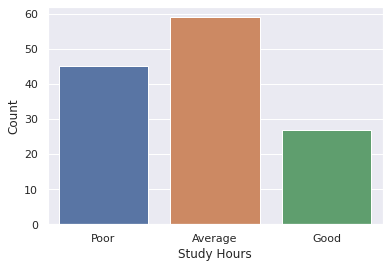

In [ ]:
# 2.)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df['sh'])
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


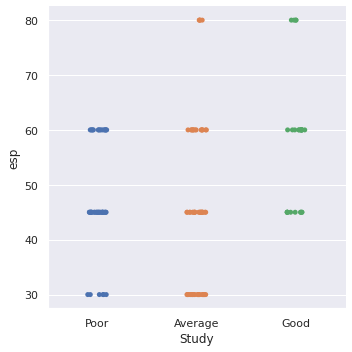

In [ ]:
# 3.)
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df1 = pd.DataFrame()
df1['Study']=pd.DataFrame(df.sh)
df1['esp']=pd.DataFrame(df.esp)
df1['esp'].mask(df1['esp'] == 'Best', 80, inplace=True)
df1['esp'].mask(df1['esp'] == 'Vg', 60, inplace=True)
df1['esp'].mask(df1['esp'] == 'Good', 45, inplace=True)
df1['esp'].mask(df1['esp'] == 'Pass', 30, inplace=True)
df1['esp'].mask(df1['esp'] == 'Fail', 30, inplace=True)
df1['exampercent']=pd.DataFrame(df.esp)
sns.factorplot(x='Study',y='esp', kind = 'strip',data=df1)
plt.show()

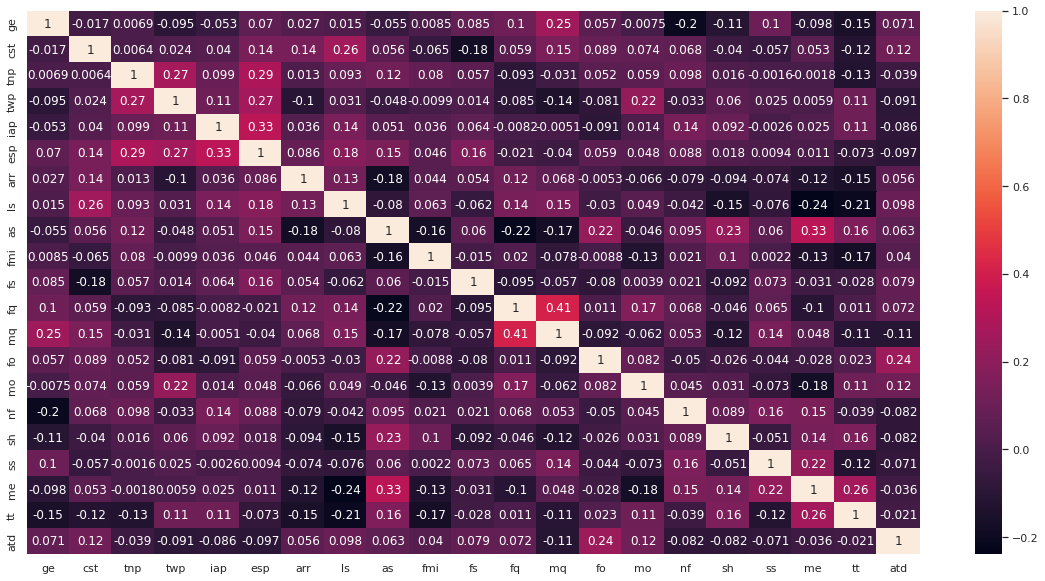

In [ ]:
# 4.)
# Import label encoder 
from sklearn import preprocessing
import seaborn as sns
label_encoder = preprocessing.LabelEncoder()  
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    # we convert categorical columns data into numerical data
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

df1 = Encoder(df)
# we drop the ms column
df1 = df1.drop('ms', axis = 1)

# we get the correlation data
corr = df1.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Please list your questions here:
#Question (1). Finding the number of Transactions done in each branch.
#Question (2).Finding the number of transactions done in various products types according to various branches.
#Queston (3). Analysing the rating given by Female and Male according t0 products purchased.
#Question (4). Analysing rating given to branches by different genders using boxplot.
'''


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:


sales = pd.read_csv('/content/supermarket_sales.csv')
sales.isnull().sum()
#it is shown below that dataset doesnot contain any null values.






Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
dtype: int64

In [ ]:
sales.head()#gives top 5 rows of dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Wednesday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Saturday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1/27/2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


Here we have seen number transactions done in all 3 branches


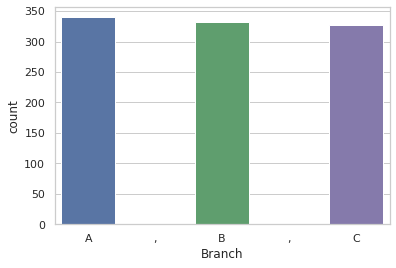

In [ ]:
#Question (1). Finding the number of Transactions done in each branch.
sns.set_style('whitegrid')
sns.countplot(x='Branch',data=sales , order='A,B,C')
print("Here we have seen number transactions done in all 3 branches")


Branch A had done more transactions compared to other branches.

In below chart, we have seen number transactions done based on products purchased in all branches


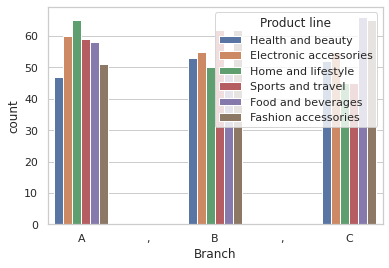

In [ ]:
#Question (2).Finding the number of transactions done in various products types according to various branches.
sns.countplot(x='Branch', order='A,B,C', hue='Product line', data=sales,saturation=0.75)
print("In below chart, we have seen number transactions done based on products purchased in all branches")


From the above graph,we have seen the most purchased product type in various branches as follows:
1.Branch A - Home and lifestyle
2.Branch B - Fashion Accessories
3.Branch c - Food and Beverages.


we have used barplot to analyze ratings given to various product types by Gender wise


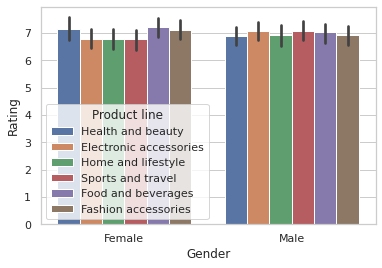

In [ ]:
#Queston (3). Analysing the rating given by Female and Male according t0 products purchased.
sns.barplot(x='Gender',hue='Product line',y='Rating',data=sales)
print("we have used barplot to analyze ratings given to various product types by Gender wise")



It is observed above male people have given better rating compared to females.

boxplot is used to demonstarte the ratings given to branches according to gender wise


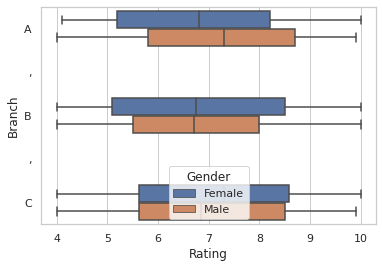

In [ ]:
#Question (4). Analysing rating given to branches by different genders using boxplot.
sns.boxplot(x='Rating',y='Branch',order = 'A,B,C',hue='Gender',data=sales)
print("boxplot is used to demonstarte the ratings given to branches according to gender wise")